# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I **Matthew de kock**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
import numpy as np                     
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Customise our plotting settings
sns.set_style('whitegrid')

#Libraries for data cleaning and preprocessing
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
import string
import re
import pickle
import nltk

#Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score # Classification report

 <a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [2]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

In [3]:
#The first five rows of the traing dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
#The first five rows of the test dataset
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
#checking the shape of the training dataframe
train.shape
print("The training dataset has {0} rows and {1} columns".format(train.shape[0], train.shape[1]))

The training dataset has 15819 rows and 3 columns


In [6]:
#checking the information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [8]:
#checking for unique values 
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [10]:
#checking the tweetid to see if there are any duplicate id's
train['tweetid'].nunique()

15819

In [11]:
train['tweetid'].duplicated().sum()

0

In [12]:
train['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

In [13]:
#creating a new dataframe for the features
df = pd.DataFrame(train[['tweetid', 'message']])

**WordCloud Visualization**

We will create a wordcloud to see the high frequency tokens for all the sentiment

(-0.5, 399.5, 199.5, -0.5)

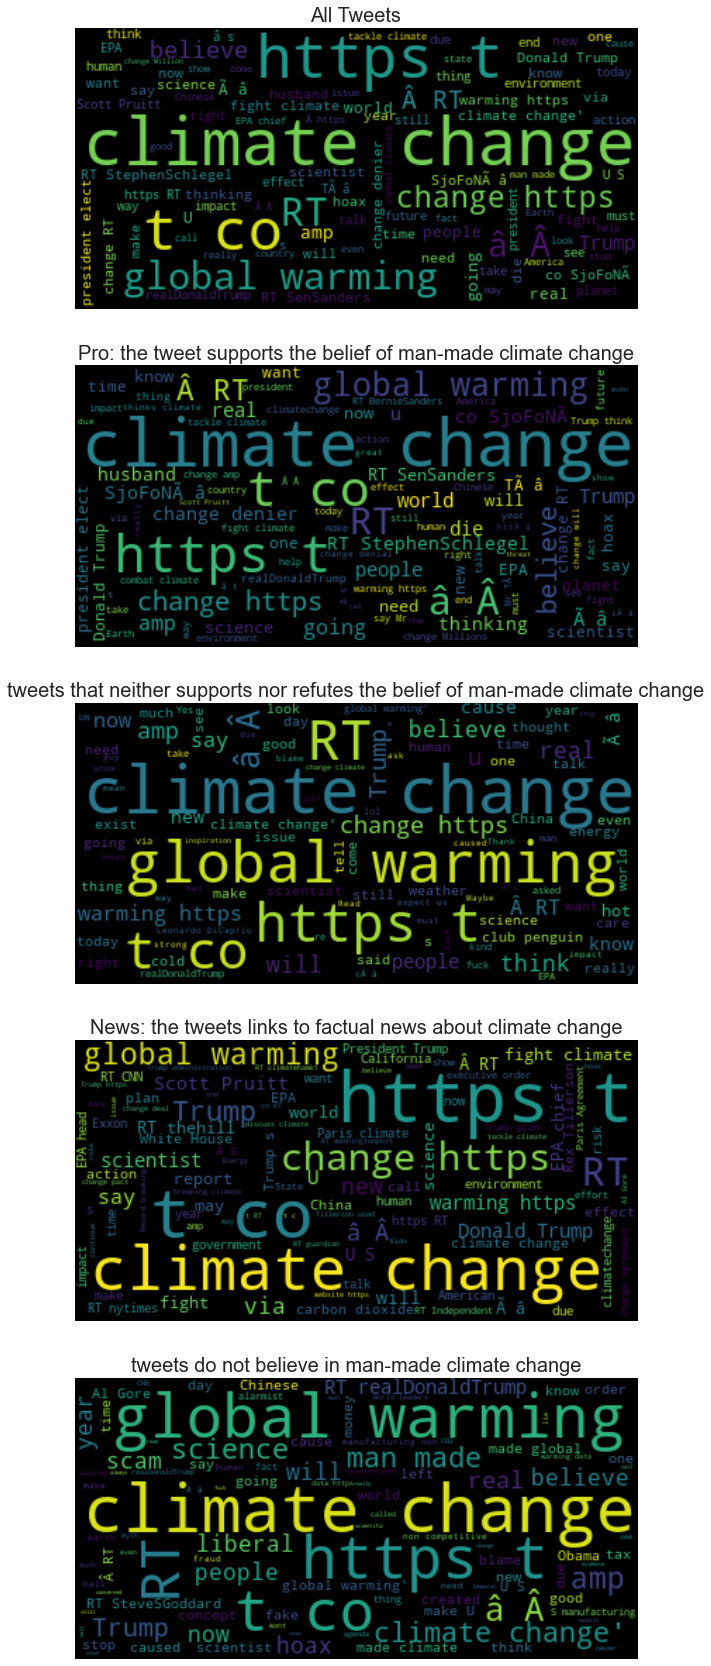

In [15]:
# Start with one review:
#classifying the tweets into it's category class
df_PRO = train[train['sentiment']==1]
df_NSR = train[train['sentiment']==0]
df_NEWS = train[train['sentiment']==2]
df_NPRO = train[train['sentiment']==-1]

#looping through each category of the tweet and joining it as a string
tweet_All = " ".join(review for review in df.message)
tweet_PRO = " ".join(review for review in df_PRO.message)
tweet_NSR = " ".join(review for review in df_NSR.message)
tweet_NEWS = " ".join(review for review in df_NEWS.message)
tweet_NPRO = " ".join(review for review in df_NPRO.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
wordcloud_PRO = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_PRO)
wordcloud_NSR = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NSR)
wordcloud_NEWS = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NEWS)
wordcloud_NPRO = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NPRO)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_PRO, interpolation='bilinear')
ax[1].set_title('Pro: the tweet supports the belief of man-made climate change',fontsize=20)
ax[1].axis('off')
ax[2].imshow(wordcloud_NSR, interpolation='bilinear')
ax[2].set_title('tweets that neither supports nor refutes the belief of man-made climate change',fontsize=20)
ax[2].axis('off')
ax[3].imshow(wordcloud_NEWS, interpolation='bilinear')
ax[3].set_title('News: the tweets links to factual news about climate change',fontsize=20)
ax[3].axis('off')
ax[4].imshow(wordcloud_NPRO, interpolation='bilinear')
ax[4].set_title('tweets do not believe in man-made climate change',fontsize=20)
ax[4].axis('off')

In [16]:
def hashtag_extract(tweets):
    """
    The function takes in tweets as input and extracts the hashtag from the tweets
    using (re) and returns the hashtags
    
    """
    hashtags=[]
    tweets=tweets.to_list()
    for tweet in tweets:
        hashtag = re.findall(r"#(\w+)",tweet)
        hashtags.append(hashtag)
    return hashtags

In [17]:
# Extract Hashtags for pro climate change 
pro_climate = hashtag_extract(train['message'][train['sentiment']==1])

# Extract Hashtags for anti climate change 
anti_climate = hashtag_extract(train['message'][train['sentiment']==-1])

In [18]:
# un-nest the lists
pro_climate = sum(pro_climate, [])
anti_climate = sum(anti_climate, [])

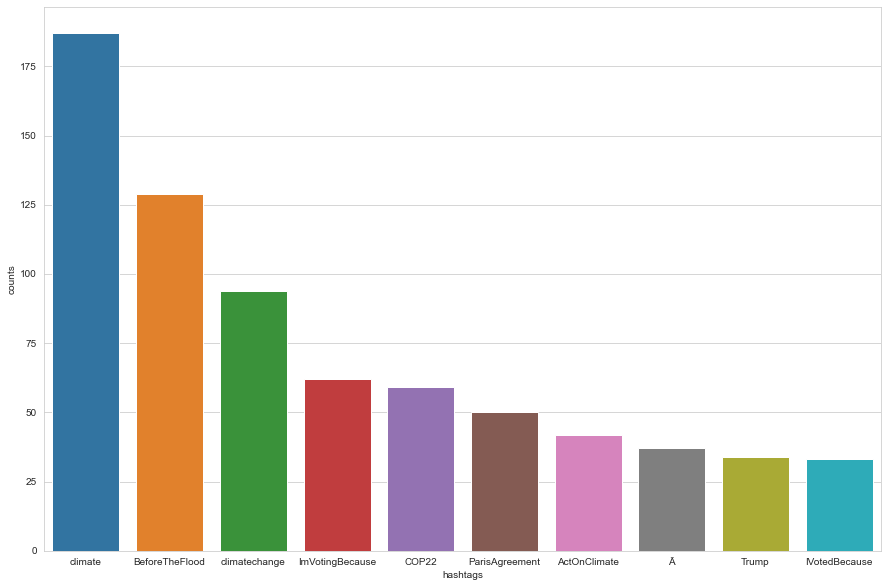

In [19]:
# For pro climate change
freq = nltk.FreqDist(pro_climate)
freq_df = pd.DataFrame({'hashtags':freq.keys(),
                       'counts':freq.values()})
# Display the top 10 frequent hashtags
freq_df = freq_df.nlargest(columns='counts', n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=freq_df, x='hashtags',y='counts');

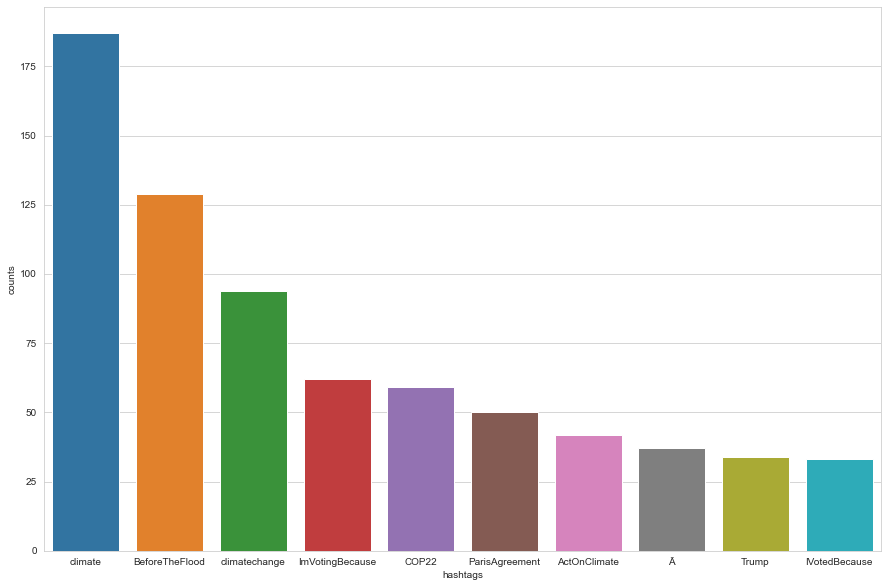

In [20]:
# For anti climate change
freq = nltk.FreqDist(pro_climate)
freq_df = pd.DataFrame({'hashtags':freq.keys(),
                       'counts':freq.values()})
# Display the top 10 frequent hashtags
freq_df = freq_df.nlargest(columns='counts', n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=freq_df, x='hashtags',y='counts');

In [21]:
# Remove Punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#Data preprocessing
#function that handles the removal punctuations from the tweets
def remove_punct(text):
    """
    the function remove_punction, it takes in a text as input and loops through
    the text, if a character is not in string.punctuation then it adds the character
    as a string to the text variable
    
    """
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [23]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message_punct'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [25]:
# Data cleaning 
def clean_data(texts):
    
    """
    clean_data(text), the function further cleans the data using (re)
    by removing extract white spaces and non text characters
    
    """
    words = list()
    for text in texts.split():
        # remove non text character from start and end of string
        text = re.sub(r'(^\W+|\W+$)','',text)
#       #remove multiple white spaces
        text = re.sub(r'\s+','',text)
#       #remove non text characters and emojis between texts
        text = re.sub(r'\W+',r'',text)
#       #remove white space at the end of strings
        text = re.sub(r'\s+$',r'',text)
#       #Remove unwanted symbols
        text = re.sub(r'[#,@,$_,?*//""]',r'',text)
        words.append(text.lower())
            
        text = [i for i in words if len(i) >= 2]

    return " ".join(text)

In [26]:
#applying the clean_data function
df['tweets'] = df['message_punct'].apply(clean_data)

In [27]:
df.head()

,tweetid,message,message_punct,tweets
0,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...
1,126103,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...
2,698562,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...,rt rawstory researchers say we have three year...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was pivotal year in th...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt soynoviodetodas its 2016 and racist sexist ...


(-0.5, 399.5, 199.5, -0.5)

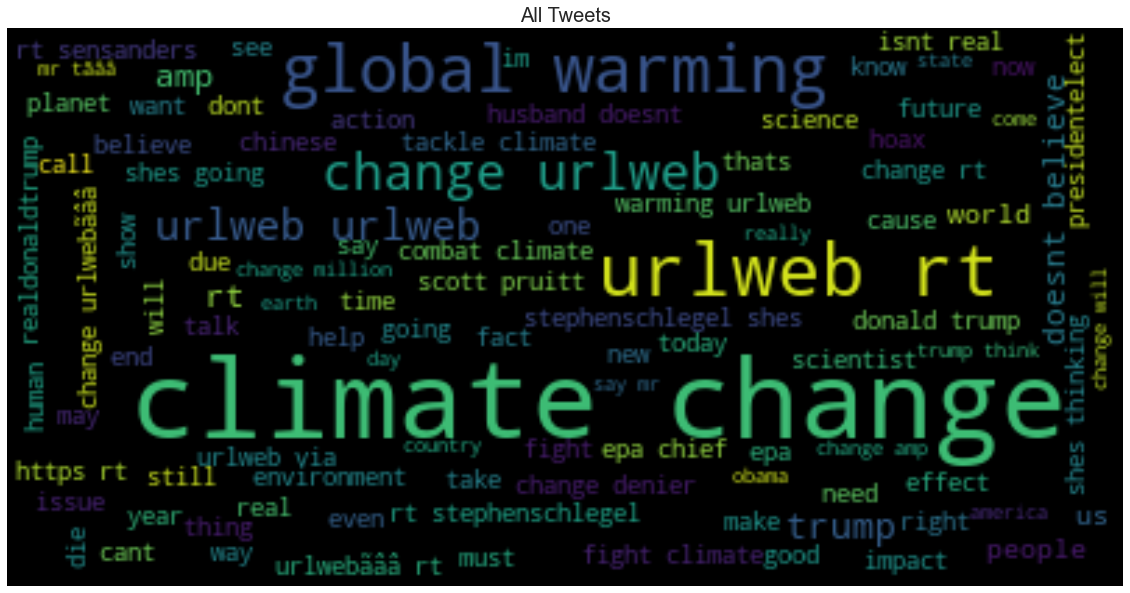

In [28]:
# Start with one review:
#looping through each category of the tweet and joining it as a string
tweet_All = " ".join(review for review in df.tweets)


fig, ax = plt.subplots(figsize  = (20,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=40, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=20)
ax.axis('off')


 <a id="four"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [29]:
#applying tokenization to the data set
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['tweets'].apply(tokeniser.tokenize)

In [30]:
#applying Lammetization
lemmatizer = WordNetLemmatizer()

In [31]:
#function that handles the process of lemmatization
def extract_lemma(words, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in words])   

In [32]:
#calling extract_lemma function on the tokens column
df['lemma'] = df['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [33]:
#using countVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 1))

In [34]:
#transforming the data using the vectorizer
X_count = vectorizer.fit_transform(df['lemma'].values.astype(str))

In [35]:
#vectorizer.get_feature_names()

In [36]:
X_count.shape

(15819, 23096)

In [38]:
# Extraxt features to help predict the label 
X = X_count.toarray()

In [39]:
# Determine our Label
y = train['sentiment']

In [40]:
#selecting the unique labels
type_labels = list(train['sentiment'].unique())
type_labels

[1, 2, 0, -1]

In [41]:
#selecting the size of the labels
heights = list(train['sentiment'].value_counts())
heights

[8530, 3640, 2353, 1296]

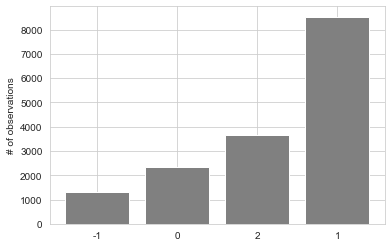

In [42]:
#ploting the unbalanced data
heights = list(train['sentiment'].value_counts())
bars = pd.DataFrame(zip(heights,type_labels), columns=['heights','labels'])
bars = bars.sort_values(by='heights',ascending=True)
plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.xticks(range(len(bars)),bars['labels'])
plt.ylabel("# of observations")
plt.show()

In [43]:
# Let's pick a class size of roughly half the size of the largest size
class_size = 4265

In [44]:
# Before resampling, let's stitch our features and labels together
data = np.concatenate([X, y[:,np.newaxis]], axis=1)

<ipython-input-44-e46fb0221f1c>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data = np.concatenate([X, y[:,np.newaxis]], axis=1)


In [45]:
#setting the index of the dataframe as labels
bar_label_df = bars.set_index('labels')
bar_label_df

,heights
labels,
-1,1296
0,2353
2,3640
1,8530


In [46]:
resampled_classes = []

# For each label
for label in range(-1,3):
    # Get num. of observations from this class
    label_size = bar_label_df.loc[label]['heights']
     
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [47]:
#concatenating the resample classes
resampled_data = np.concatenate(resampled_classes, axis=0)

In [48]:
resampled_data.shape

(17060, 23097)

In [49]:
#Split resampled data into X and y
X_resampled = resampled_data[:,:-1]
y_resampled = resampled_data[:,-1]

In [50]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## TEST DATA PREPROCESSING

All the preprocessing steps which were applied on the training data will also be applied on the test data. 

In [51]:
#creating a test dataframe
test_df = pd.DataFrame(test[['tweetid', 'message']])

In [52]:
#removing http and replacing it with url pattern
test_df['message_punct'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [53]:
#applying the remove punctuation funtion to the test data
# test_df['message_punct'] = test_df['message_punct'].apply(lambda x: remove_punct(x))
# df.head()

In [54]:
#apply the clean_data function
test_df['tweets'] = test_df['message_punct'].apply(clean_data)

In [55]:
#applying tokenizer
test_df['tokens'] = test_df['tweets'].apply(tokeniser.tokenize)

In [56]:
#applying the extract_lemma function
test_df['lemma'] = test_df['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [57]:
#transforming the data using vectorizer
test_count = vectorizer.transform(test_df['lemma'].values.astype(str))

In [58]:
#selecting the feature
x_test = test_count.toarray()

In [59]:
#the shape of the feature
x_test.shape

(10546, 23096)

 <a id="five"></a>
## 5. Modeling
<a href=#cont>Back to Table of Contents</a>

In this Section, we will be implementing mulitple Machine Learning model on our countvectorizer object to see the best performing model i.e The model which gives the highest `F1_Score`.

In [60]:
lg_clf = LogisticRegression(random_state = 0)

In [61]:
lg_clf.fit(X_train, y_train)

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [62]:
lg_clf.fit(X_train, y_train)

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

 <a id="six"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

The models have been trained and their respective performances would be checked on the test data set to evaluate the best performing model based on the designated f1_score metric.

### Resampled Data Model Performances

In [63]:
#model preformance with resampled labels
y_pred_resampled = lg_clf.predict(X_test)
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

          -1       0.75      0.42      0.53       325
           0       0.60      0.45      0.51       589
           1       0.76      0.85      0.80      2134
           2       0.73      0.75      0.74       907

    accuracy                           0.73      3955
   macro avg       0.71      0.62      0.65      3955
weighted avg       0.73      0.73      0.72      3955



In [64]:
y_pred = lg_clf.predict(X_test)

In [65]:
#making prediction
prediction = lg_clf.predict(x_test)

In [66]:
#creating a dataframe for the submission
submission = pd.DataFrame(list(zip(test['tweetid'],  prediction)), columns = ['tweetid', 'sentiment'])
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [67]:
#saving the file as csv
submission.to_csv('submission.csv', index_label = False, index = False)

 <a id="seven"></a>
## 7. Model Explanations
<a href=#cont>Back to Table of Contents</a>